# Ïù¥ÎØ∏ÏßÄ ÏãùÎ≥Ñ Î®∏Ïã†ÏùÑ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞Î•º Ï§ÄÎπÑÌïúÎã§.

## ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Î∂àÎü¨ Ïò®Îã§.

In [18]:
# Îç∞Ïù¥ÌÑ∞ ÌîåÎ°úÌåÖ ÎùºÏù¥Î∏åÎü¨Î¶¨
import matplotlib.pyplot as plt
# Ïà´Ïûê Ï≤òÎ¶¨ ÎùºÏù¥Î∏åÎü¨Î¶¨
import numpy as np
# Îî•Îü¨ÎãùÏùÑ ÏúÑÌïú ÌååÏù¥ÌÜ†Ïπò ÎùºÏù¥Î∏åÎü¨Î¶¨
import torch
from torch import nn, optim
# ÌÜ†ÏπòÎπÑÏ†Ñ ÎùºÏù¥Î∏åÎü¨Î¶¨
import torchvision
from torchvision import datasets, transforms, models
# Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨ ÎùºÏù¥Î∏åÎü¨Î¶¨ (PIL, pillow)
from PIL import Image
# Ï£ºÌîºÌÑ∞ ÎÖ∏Ìä∏Î∂ÅÏóêÏÑú plotÏù¥ Î≥¥Ïù¥ÎèÑÎ°ù ÏÑ§Ï†ï
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Îç∞Ïù¥ÌÑ∞ ÎîîÎ†âÌÜ†Î¶¨, Î∂ÑÌï† ÎπÑÏú®, Î≥ÄÌôò Î∞©Î≤ïÏùÑ ÏÑ§Ï†ïÌïúÎã§.

In [19]:
# Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎäî ÎîîÎ†âÌÜ†Î¶¨ÏôÄ Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏ Î∂ÑÌï† ÎπÑÏú®(valid_size)ÏùÑ Ï†ïÌïúÎã§.
data_dir = './data/data'
valid_size = 0.2

# Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞Î•º ResNet50ÏóêÏÑú Îã§Î£∞ Ïàò ÏûàÎèÑÎ°ù Î≥ÄÌôòÏãúÌÇ§Îäî Î∞©Î≤ïÏùÑ Ï†ïÌïúÎã§. (t_transforms)
#t_transforms = transforms.Compose([
#                transforms.RandomResizedCrop(224),
#                transforms.Resize(224),
#                transforms.ToTensor()
#])
# convert image size to 224x224 for ResNet50 after crop
t_transforms = transforms.Compose([
                transforms.RandomResizedCrop(224),
                transforms.Resize(224),
                transforms.ToTensor()
])




### (ÌôïÏù∏) Î≥ÄÌôò Î∞©Î≤ïÏùÑ Ï∂úÎ†•ÌïòÏó¨ ÌôïÏù∏Ìï¥ Î≥∏Îã§.

In [20]:
# ÏÑ§Ï†ïÌïú Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò Î∞©Î≤ïÏùÑ Ï∂úÎ†•ÌïòÏó¨ ÌôïÏù∏ÌïúÎã§.
print(t_transforms)

Compose(
    RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
    Resize(size=224, interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)


## Îç∞Ïù¥ÌÑ∞Î•º Î°úÎî© Ìï®ÏàòÎ•º ÏûëÏÑ±ÌïúÎã§.

### (Ïó∞Ïäµ) trainloaderÏôÄ testloaderÎ•º ÎßåÎì§Ïñ¥ Î≥∏Îã§.

#### 1. ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Ïùò ÎîîÎ†âÌÜ†Î¶¨ Î∞è Î≥ÄÌôò Î∞©ÏãùÏùÑ ÏßÄÏ†ïÌïúÎã§.

In [21]:
# datasets.ImageFolderÎ•º ÏÇ¨Ïö©Ìï¥ÏÑú ÌïôÏäµ Îç∞Ïù¥ÌÑ∞(train_data)ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(test_data)Î•º ÎßåÎì†Îã§.
# make train_data and test_data using datasets.ImageFolder
train_data = datasets.ImageFolder(data_dir, transform=t_transforms)
test_data = datasets.ImageFolder(data_dir, transform=t_transforms)

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò ÌòïÏãùÏùÑ ÌôïÏù∏ÌïúÎã§.
print(train_data)

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Í∏∏Ïù¥Î•º ÌôïÏù∏ÌïúÎã§.
print(len(train_data), len(test_data))

Dataset ImageFolder
    Number of datapoints: 155
    Root location: ./data/data
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
               Resize(size=224, interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
155 155


#### 2. Îç∞Ïù¥ÌÑ∞ÏÑ∏Ìä∏Î•º ÏÑûÍ∏∞ ÏúÑÌï¥, Ïö∞ÏÑ† Ïù∏Îç±Ïä§Î•º ÎßåÎì§Ïñ¥ ÎûúÎç§ÌïòÍ≤å ÏÑûÎäîÎã§.

In [22]:
# train_data ÏÇ¨Ïù¥Ï¶àÎßåÌÅºÏùò Ï†ïÏàòÍ∞íÏùÑ Í∞ñÎäî Ïù∏Îç±Ïä§ Î¶¨Ïä§Ìä∏(indices)Î•º ÎßåÎì§Í≥† ÌôïÏù∏ÌïúÎã§.
num_train = len(train_data)
indices = list(range(num_train))
print(indices)

# Ïù∏Îç±Ïä§ Î¶¨Ïä§Ìä∏Î•º ÎûúÎç§ÌïòÍ≤å ÏÑûÍ≥† ÌôïÏù∏ÌïúÎã§.
np.random.shuffle(indices)
print(indices)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154]
[81, 46, 65, 85, 55, 64, 48, 103, 110, 112, 88, 11, 54, 107, 109, 129, 50, 148, 142, 114, 72, 53, 77, 33, 145, 47, 104, 113, 132, 115, 58, 83, 63, 39, 96, 151, 31, 95, 105, 36, 42, 40, 150, 87, 1, 23, 59, 71, 44, 0, 130, 19, 127, 78, 121, 76, 137, 147, 45, 117, 153, 60, 134, 133, 41, 119, 74, 4, 3, 111, 15, 28, 125, 32, 94, 9, 90, 8

#### 3. Î∂ÑÌï† ÎπÑÏú®(valid_size)Ïóê Îî∞Î•∏ ÏßÄÏ†êÏùò Ïù∏Îç±Ïä§ Í∞í(split)ÏùÑ Í≥ÑÏÇ∞ÌïúÎã§.

In [23]:
# Î∂ÑÌï† ÎπÑÏú®(valid_size)Ïóê Ìï¥ÎãπÌïòÎäî Ïù∏Îç±Ïä§Î•º Í≥ÑÏÇ∞ÌïòÍ≥† ÌôïÏù∏Ìï¥ Î≥∏Îã§.
split = int(np.floor(num_train * valid_size))
print(split)

31


#### 4. splitÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Ïù∏Îç±Ïä§ Î¶¨Ïä§Ìä∏ÏôÄ ÌÖåÏä§Ìä∏ Ïù∏Îç±Ïä§ Î¶¨Ïä§Ìä∏Î°ú ÎÇòÎààÎã§.

In [24]:
# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Ïù∏Îç±Ïä§ Î¶¨Ïä§Ìä∏ Î∞è ÌÖåÏä§Ìä∏ Ïù∏Îç±Ïä§ Î¶¨Ïä§Ìä∏Î•º ÎßåÎì§Í≥† ÌôïÏù∏Ìï¥ Î≥∏Îã§.

train_idx, test_idx = indices[split:], indices[:split]

print(train_idx)
print(test_idx)

[83, 63, 39, 96, 151, 31, 95, 105, 36, 42, 40, 150, 87, 1, 23, 59, 71, 44, 0, 130, 19, 127, 78, 121, 76, 137, 147, 45, 117, 153, 60, 134, 133, 41, 119, 74, 4, 3, 111, 15, 28, 125, 32, 94, 9, 90, 86, 139, 25, 70, 26, 61, 67, 34, 20, 99, 84, 140, 51, 143, 27, 106, 21, 75, 136, 2, 100, 102, 73, 8, 131, 29, 152, 37, 17, 14, 154, 52, 92, 66, 141, 69, 93, 6, 82, 144, 13, 35, 89, 128, 18, 108, 146, 49, 126, 7, 80, 62, 24, 12, 91, 98, 38, 68, 56, 57, 43, 5, 124, 10, 30, 79, 16, 149, 22, 122, 123, 101, 120, 97, 135, 118, 116, 138]
[81, 46, 65, 85, 55, 64, 48, 103, 110, 112, 88, 11, 54, 107, 109, 129, 50, 148, 142, 114, 72, 53, 77, 33, 145, 47, 104, 113, 132, 115, 58]


#### 5. Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Îì§Ïùò ÏÉòÌîåÎü¨ Î∞è Î°úÎçîÎ•º ÎßåÎì§Í≥† ÌôïÏù∏ÌïúÎã§.

In [25]:
# Îç∞Ïù¥ÌÑ∞ ÏÉòÌîåÎßÅ Î∞©Ïãù(SubsetRandomSampler)ÏùÑ ÏßÄÏ†ïÌïúÎã§
from torch.utils.data.sampler import SubsetRandomSampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# Îç∞Ïù¥ÌÑ∞ Î°úÎî©ÏùÑ ÏúÑÌïú loaderÎ•º ÎßåÎì†Îã§. (sampler, Î∞∞Ïπò ÏÇ¨Ïù¥Ï¶à Îì± ÏßÄÏ†ï)
trainloader = torch.utils.data.DataLoader(train_data, sampler=train_sampler, batch_size=16)
testloader = torch.utils.data.DataLoader(test_data, sampler=test_sampler, batch_size=16)

# ÌïôÏäµ loaderÏôÄ ÌÖåÏä§Ìä∏ loaderÏùò classÎì§ÏùÑ Ï∂úÎ†•ÌïòÏó¨ ÌôïÏù∏ÌïúÎã§.
print(trainloader.dataset.classes)
print(testloader.dataset.classes)

['Basalt', 'Highland']
['Basalt', 'Highland']


### ÏΩîÎìúÎì§ÏùÑ Î¨∂Ïñ¥ÏÑú load_split_train_test() Ìï®ÏàòÎ•º ÎßåÎì†Îã§.

In [26]:
# ÏúÑÏùò ÏΩîÎìúÎì§ÏùÑ Î¨∂Ïñ¥ÏÑú load_split_train_test() Ìï®ÏàòÎ•º ÎßåÎì†Îã§. (ÏûÖÎ†• : Îç∞Ïù¥ÌÑ∞ ÎîîÎ†âÌÜ†Î¶¨, Î∂ÑÌï† ÎπÑÏú®) (Ï∂úÎ†• : ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Î°úÎçî, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎçî)

def load_split_train_test(data_dir, valid_size) :
    t_transforms = transforms.Compose([
                transforms.RandomResizedCrop(224),
                transforms.Resize(224),
                transforms.ToTensor()
    ])
    
    train_data = datasets.ImageFolder(data_dir, transform=t_transforms)
    test_data = datasets.ImageFolder(data_dir, transform=t_transforms)
    num_train = len(train_data)
    indices = list(range(num_train))

    np.random.shuffle(indices)
    split = int(np.floor(num_train * valid_size))
    train_idx, test_idx = indices[split:], indices[:split]
    from torch.utils.data.sampler import SubsetRandomSampler

    train_sampler = SubsetRandomSampler(train_idx)
    test_sampler = SubsetRandomSampler(test_idx)

    trainloader = torch.utils.data.DataLoader(train_data, sampler=train_sampler, batch_size=16)
    testloader = torch.utils.data.DataLoader(test_data, sampler=test_sampler, batch_size=16)

    return trainloader, testloader

### load_split_train_test() Ìï®ÏàòÎ•º Ïù¥Ïö©ÌïòÏó¨ trainloader, testloaderÎ•º ÏÉùÏÑ±ÌïúÎã§.

In [27]:
# load_split_train_test() Ìï®ÏàòÎ•º Ïù¥Ïö©ÌïòÏó¨ trainloaderÏôÄ testloaderÎ•º ÎßåÎì§Í≥† ÌôïÏù∏ÌïúÎã§.
trainloader, testloader = load_split_train_test(data_dir, 0.2)

print(trainloader.dataset.classes)
print(testloader.dataset.classes)

['Basalt', 'Highland']
['Basalt', 'Highland']


## Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞ ÏÉòÌîåÎì§ÏùÑ ÏÇ¥Ìé¥Î≥∏Îã§.

### ÏûÑÏùòÏùò Îç∞Ïù¥ÌÑ∞Î•º Î°úÎî©Ìïú ÌõÑ Ïù¥ÎØ∏ÏßÄÏôÄ Î†àÏù¥Î∏îÏùÑ Î∞òÌôòÌïòÎäî get_random_images() Ìï®ÏàòÎ•º ÎßåÎì†Îã§.

In [28]:
def get_random_images(num) :

    data = datasets.ImageFolder(data_dir, transform=t_transforms)
    indices = list(range(len(data)))
    np.random.shuffle(indices)
    idx = indices[:num]

    from torch.utils.data.sampler import SubsetRandomSampler
    sampler = SubsetRandomSampler(idx)
    loader = torch.utils.data.DataLoader(data, sampler=sampler, batch_size=num)
    # loaderÏóêÏÑú Îç∞Ïù¥ÌÑ∞Î•º Ìïú Í∞úÏî© Í∫ºÎÇ¥ Ï£ºÎäî iteratorÎ•º ÏÉùÏÑ±ÌïúÎã§.
    dataiter = iter(loader)
    images, labels = next(dataiter)

    return images, labels

### ÏûÑÏùò ÏÑ†ÌÉùÌïú Ïù¥ÎØ∏ÏßÄÎ•º ÌëúÏãúÌï¥ Î≥∏Îã§.

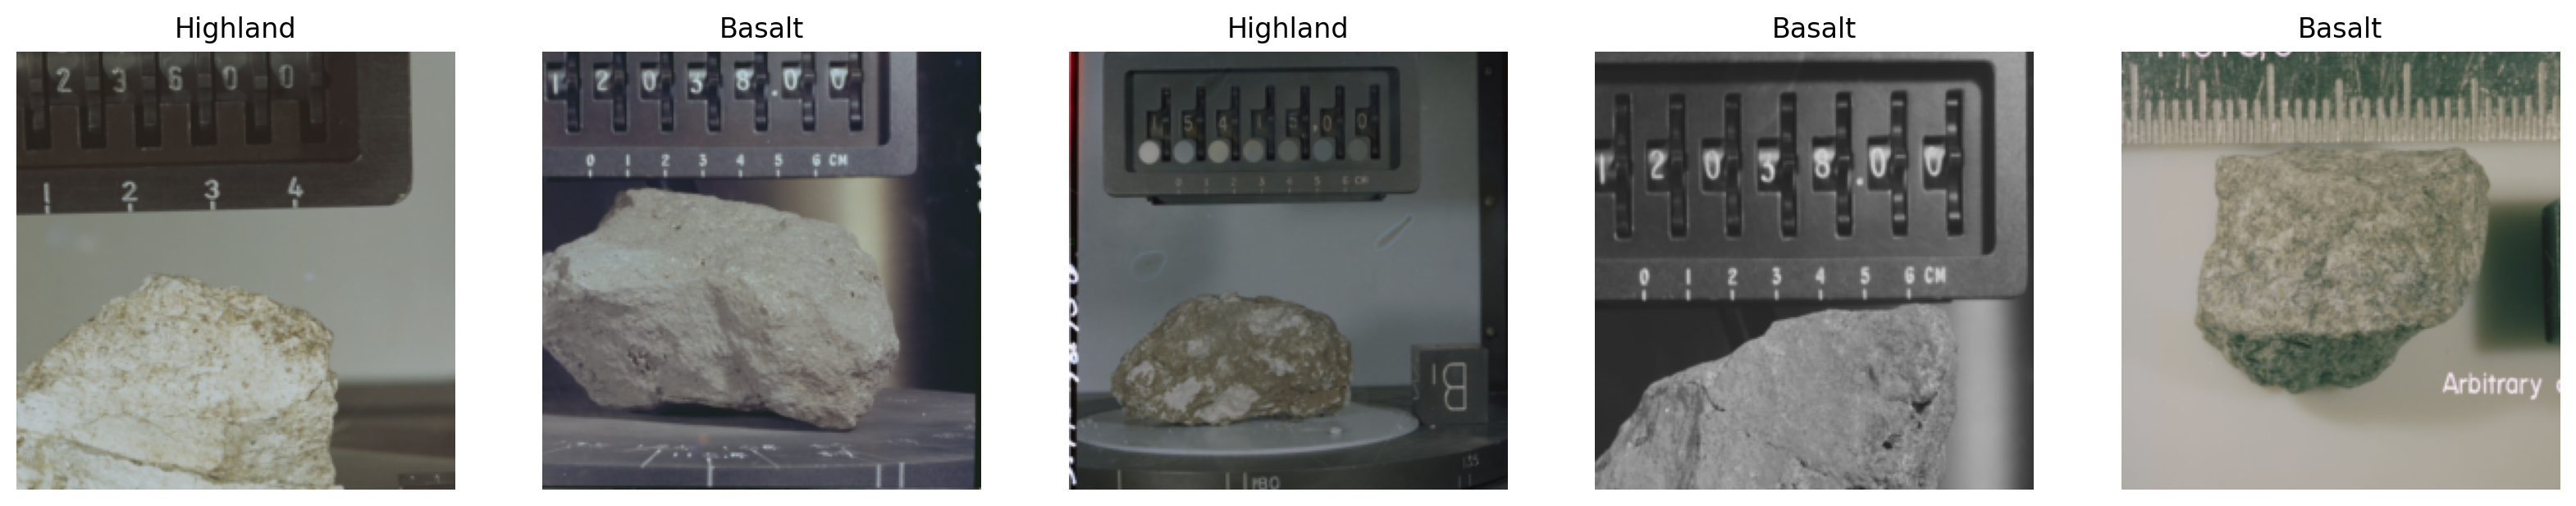

In [29]:
# 5Í∞úÏùò Ïù¥ÎØ∏ÏßÄÏôÄ Î†àÏù¥Î∏îÏùÑ ÎûúÎç§ÌïòÍ≤å Í∞ÄÏ†∏Ïò®Îã§.
images, labels = get_random_images(5)
# ÌîΩÏÖÄ Î∞∞Ïó¥ÏùÑ PIL ÌòïÏãùÏùò Ïù¥ÎØ∏ÏßÄÎ°ú Î≥ÄÌôòÌïòÍ≥† Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞Î•º ÏßÄÏ†ïÌïúÎã§.
to_pil = transforms.ToPILImage()
fig = plt.figure(figsize=(20, 20))
# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïùò class Î¶¨Ïä§Ìä∏Î•º ÏñªÎäîÎã§.
classes = trainloader.dataset.classes
# Ïù¥ÎØ∏ÏßÄÎ•º ÌëúÏãúÌïòÍ∏∞ ÏúÑÌïú ÏÑ§Ï†ïÏùÑ ÌïúÎã§.
for ii in range(len(images)) :
    image = to_pil(images[ii])
    sub = fig.add_subplot(1, len(images), ii+1)
    index = labels[ii].item()
    sub.set_title(classes[index])
    plt.axis('off')
    plt.imshow(image)
# Ï£ºÌîºÌÑ∞ ÎÖ∏Ìä∏Î∂ÅÏóê Ïù¥ÎØ∏ÏßÄÎ•º ÌëúÏãúÌïúÎã§.
plt.show()

# ResNet50 Î™®Îç∏ÏùÑ Í∞ÄÏ†∏ÏôÄ FCL(Fully Connected Layer)ÏùÑ ÏàòÏ†ïÌïúÎã§.

## Compute deviceÎ•º Ï†ïÌïúÎã§(CPU or GPU)

In [30]:
# compute deviceÎ•º Ï†ïÌïòÍ≥† ÌôïÏù∏ÌïúÎã§.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


## ÏÇ¨Ï†ÑÌïôÏäµÎêú ResNet50 Î™®Îç∏ÏùÑ ÏßÄÏ†ïÌïúÎã§.

In [31]:
# resnet50 Î™®Îç∏ÏùÑ pretrained=TrueÎ°ú ÏÑ§Ï†ïÌïúÎã§.
model = models.resnet50(pretrained=True)

/workspaces/A00-spacerocks/.venv/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/workspaces/A00-spacerocks/.venv/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /home/codespace/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100.0%


### (ÌôïÏù∏) ÏàòÏ†ï Ï†ÑÏùò ResNet50 Î™®Îç∏ÏùÑ ÌôïÏù∏Ìï¥ Î≥∏Îã§. 

In [32]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## FCLÏùÑ ÏàòÏ†ïÌïúÎã§.(Îâ¥Îü∞ Íµ¨Ï∂ï, Ïã†Í≤ΩÎßù Ïó∞Í≤∞, FCLÏùò layer ÏÑ§Ï†ï Îì±)

In [33]:
# Î™®Îì† Ïã†Í≤ΩÎßù Íµ¨Ï∂ï : Ï†ÑÏù¥ÌïôÏäµÏùÑ ÏúÑÌï¥ Î™®Îç∏Ïùò Í∞ÄÏ§ëÏπòÎ•º freeze ÌïúÎã§.
for param in model.parameters():
    # freeze model weights
    param.requires_grad = False
    
# Îâ¥Îü∞Îì§ÏùÑ Ïó∞Í≤∞ÌïòÏó¨ Ïã†Í≤ΩÎßùÏùÑ ÏÉùÏÑ±ÌïúÎã§.
model.fc = nn.Sequential(nn.Linear(2048, 512),
                            nn.ReLU(),
                            nn.Dropout(0.2),
                            nn.Linear(512, 2),
                            nn.LogSoftmax(dim=1))
# q: explain the above code
# a: 2048Í∞úÏùò ÏûÖÎ†•ÏùÑ Î∞õÏïÑ 512Í∞úÏùò Ï∂úÎ†•ÏùÑ ÎÇ¥Í≥†, ReLU Ìï®ÏàòÎ•º Í±∞Ï≥ê 0.2Ïùò ÌôïÎ•†Î°ú DropoutÏùÑ Ï†ÅÏö©ÌïúÎã§.
# 512Í∞úÏùò ÏûÖÎ†•ÏùÑ Î∞õÏïÑ 2Í∞úÏùò Ï∂úÎ†•ÏùÑ ÎÇ¥Í≥†, LogSoftmax Ìï®ÏàòÎ•º Í±∞Ï≥ê 1Ï∞®ÏõêÏúºÎ°ú Î≥ÄÌôòÌïúÎã§.
# 1Ï∞®ÏõêÏúºÎ°ú Î≥ÄÌôòÎêú Ï∂úÎ†•ÏùÑ Í∞ñÎäî Ïã†Í≤ΩÎßùÏùÑ ÏÉùÏÑ±ÌïúÎã§.

# ÏÜêÏã§Ìï®ÏàòÎ•º Cross entropy loss Ìï®ÏàòÎ°ú ÏßÄÏ†ïÌïúÎã§.
criterion = nn.NLLLoss()
# why
# optimizerÎ•º AdamÏúºÎ°ú ÏßÄÏ†ïÌïúÎã§.
# what is Adam
#
optimizer = optim.Adam(model.fc.parameters(), lr=0.003)
# Ïã†Í≤ΩÎßùÏùÑ compute deviceÎ°ú Î≥¥ÎÇ∏Îã§.
model.to(device)
# Ï¢ÖÎ£å Ïó¨Î∂ÄÎ•º Ï∂úÎ†•ÌïúÎã§.
print('done!')

done!


### (ÌôïÏù∏) FCLÏùÑ ÌôïÏù∏Ìï¥ Î≥∏Îã§.

In [34]:
print(model.fc)

Sequential(
  (0): Linear(in_features=2048, out_features=512, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=512, out_features=2, bias=True)
  (4): LogSoftmax(dim=1)
)


# Î™®Îç∏Ïùò FCLÏùÑ ÌïôÏäµÏãúÌÇ§Í≥† ÌÖåÏä§Ìä∏ ÌïúÎã§.

## Î™®Îç∏ ÌïôÏäµ/Í≤ÄÏ¶ùÏùÑ ÏúÑÌïú Î≥ÄÏàòÎ•º ÏÑ§Ï†ïÌïúÎã§.

In [35]:
# ÏóêÌè≠ Î∞è Ï∂úÎ†• Í∞ÑÍ≤©ÏùÑ ÏÑ§Ï†ïÌïúÎã§.
epochs = 10
print_every = 5
# ÏÜêÏã§ Î≥ÄÏàòÎì§ÏùÑ Ï¥àÍ∏∞Ìôî ÌïúÎã§.
running_loss = 0
train_losses, test_losses = [], []
# ÌòÑÏû¨Ïùò ÌïôÏäµ Îã®Í≥ÑÎ•º ÌëúÌòÑÌïòÎäî steps Î≥ÄÏàòÎ•º 0ÏúºÎ°ú Ï¥àÍ∏∞Ìôî ÌïúÎã§.
steps = 0

## ÏÑ§Ï†ïÌïú ÏóêÌè≠ÎßåÌÅº Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇ§Î©∞ Í≤ÄÏ¶ù/ÌèâÍ∞Ä ÌïúÎã§.

In [49]:
# ÏÑ§Ï†ïÌïú ÌöåÏàòÎßåÌÅº ÌïôÏäµ ÌõÑ ÌÖåÏä§Ìä∏ Î∞è ÌèâÍ∞ÄÌï¥ Î≥∏Îã§.
for epoch in range(epochs) :
    # ÏóêÌè≠ÏùÑ count ÌïúÎã§.
    epoch += 1
    # trainloaderÎ°úÎ∂ÄÌÑ∞ Î™®Îì† Ïù¥ÎØ∏ÏßÄÏôÄ Î†àÏù¥Î∏îÏùÑ Î°úÎìúÌïúÎã§.
    for inputs, labels in trainloader:
        # ÌïôÏäµ Îã®Í≥ÑÎ•º count ÌïòÍ≥† Ï∂úÎ†•ÌïúÎã§.
        steps += 1
        print('Training step ', steps)
        # ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞(Ïù¥ÎØ∏ÏßÄ, Î†àÏù¥Î∏î)Î•º deviceÎ°ú Î≥¥ÎÇ∏Îã§.
        inputs, labels = inputs.to(device), labels.to(device)
        # Í∏∞Ï°¥Ïóê ÌïôÏäµÎêú gradient Í∞íÏùÑ Ï¥àÍ∏∞Ìôî ÌïúÎã§.(Ïù¥Ï†ÑÏóê ÌïôÏäµÌïú Í∞íÏù¥ ÏòÅÌñ•ÏùÑ Ï£ºÏßÄ ÏïäÎèÑÎ°ù Ìï®)
        optimizer.zero_grad()
        # ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞Î°ú ÏàúÏ†ÑÌååÎ•º ÏàòÌñâÌïòÍ≥† Î°úÍ∑∏ ÌôïÎ•†ÏùÑ ÏñªÎäîÎã§.
        logps = model.forward(inputs)
        # ÏÜêÏã§(loss) Í∞íÎì§ÏùÑ Í≥ÑÏÇ∞ÌïúÎã§.
        loss = criterion(logps, labels)
        # ÏÜêÏã§Í∞íÏùÑ Ïù¥Ïö©ÌïòÏó¨ gradientÎ•º updateÌïúÎã§.
        loss.backward()
        # gradientÎ•º Ïù¥Ïö©ÌïòÏó¨ ÏÑ§Ï†ïÎêú optimizerÎ°ú ÌååÎùºÎØ∏ÌÑ∞Î•º updateÌïúÎã§.
        optimizer.step()
        # ÏÜêÏã§Í∞íÏùÑ ÎàÑÏ†Å/Í≥ÑÏÇ∞ÌïúÎã§.
        running_loss += loss.item()
        # ÌïôÏäµ Îã®Í≥Ñ 5ÌöåÎßàÎã§ Î™®Îç∏ÏùÑ ÌÖåÏä§Ìä∏/ÌèâÍ∞Ä ÌïúÎã§.
        if steps % print_every == 0:
            # ÏÜêÏã§Í≥º Ï†ïÌôïÎèÑ Î≥ÄÏàòÎ•º Ï¥àÍ∏∞Ìôî ÌïúÎã§.
            test_loss = 0
            accuracy = 0
            # Î™®Îç∏ ÌèâÍ∞Ä Î™®ÎìúÎ°ú Ï†ÑÌôòÌïúÎã§.
            model.eval()
            # Î™®Îç∏ ÌèâÍ∞Ä Ïãú gradientÎ•º Í≥ÑÏÇ∞ÌïòÏßÄ ÏïäÎèÑÎ°ù ÌïúÎã§.
            with torch.no_grad():
                # testloaderÎ°úÎ∂ÄÌÑ∞ Î™®Îì† Ïù¥ÎØ∏ÏßÄÏôÄ Î†àÏù¥Î∏îÏùÑ Î°úÎìúÌïúÎã§.
                for inputs, labels in testloader:
                    # ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞(Ïù¥ÎØ∏ÏßÄ, Î†àÏù¥Î∏î)Î•º deviceÎ°ú Î≥¥ÎÇ∏Îã§.
                    inputs, labels = inputs.to(device), labels.to(device)
                    # ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞Î°ú ÏàúÏ†ÑÌååÎ•º ÏàòÌñâÌïòÍ≥† Î°úÍ∑∏ ÌôïÎ•†ÏùÑ ÏñªÎäîÎã§.
                    logps = model.forward(inputs)
                    # ÏÜêÏã§(loss) Í∞íÎì§ÏùÑ Í≥ÑÏÇ∞ÌïúÎã§.
                    batch_loss = criterion(logps, labels)
                    # ÏÜêÏã§Í∞íÏùÑ ÎàÑÏ†ÅÏãúÌÇ®Îã§.
                    test_loss += batch_loss.item()
                    # Î°úÍ∑∏ ÌôïÎ•†Î°úÎ∂ÄÌÑ∞ ÏßÑÏßú ÌôïÎ•†Í∞íÏùÑ Í≥ÑÏÇ∞ÌïúÎã§.
                    ps = torch.exp(logps)
                    # Í∞ÄÏû• ÌÅ∞ ÌôïÎ•†Í∞íÍ≥º classÎ•º ÏñªÎäîÎã§. (topk : kÎ≤àÏß∏Î°ú ÌÅ∞ Í∞í)
                    top_p, top_class = ps.topk(1, dim=1)
                    # Î†àÏù¥Î∏îÎì§ÏùÑ top_classÏôÄ ÎèôÏùºÌïú ÌòïÌÉúÎ°ú Î∞îÍæº ÌõÑ Í∞ôÏùÄ Í∞íÎì§ÏùÑ ÏñªÎäîÎã§.
                    equals = top_class == labels.view(*top_class.shape)
                    # equalsÎ•º float ÌÖêÏÑúÎ°ú Î∞îÍæº ÌõÑ ÌèâÍ∑† Ï†ïÌôïÎèÑÎ•º ÎàÑÏ†Å/Í≥ÑÏÇ∞ÌïúÎã§.
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
            # ÌïôÏäµ ÏÜêÏã§Í∞íÍ≥º ÌÖåÏä§Ìä∏ ÏÜêÏã§Í∞íÏùÑ Ï∂îÍ∞ÄÌïúÎã§.
            train_losses.append(running_loss/len(trainloader))
            test_losses.append(test_loss/len(testloader))
            # ÌïôÏäµ ÏÜêÏã§Í∞í, ÌÖåÏä§Ìä∏ ÏÜêÏã§Í∞í, ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑÎ•º Ï∂úÎ†•ÌïúÎã§.
            print("Epoch {}/{}: ".format(epoch, epochs),
                  "Train loss: {:.3f}.. ".format(running_loss/print_every),
                  "Test loss: {:.3f}.. ".format(test_loss/len(testloader)),
                  "Test accuracy: {:.3f}\n".format(accuracy/len(testloader))) 
            # running_loss Í∞íÏùÑ Ï¥àÍ∏∞Ìôî ÌïúÎã§.
            running_loss = 0
            # Î™®Îç∏ ÌïôÏäµ Î™®ÎìúÎ°ú Ï†ÑÌôòÌïúÎã§.
            model.train()
            break

Training step  51
Training step  52
Training step  53
Training step  54
Training step  55
Epoch 1/10:  Train loss: 0.365..  Test loss: 0.422..  Test accuracy: 0.742

Training step  56
Training step  57
Training step  58
Training step  59
Training step  60
Epoch 2/10:  Train loss: 0.691..  Test loss: 0.454..  Test accuracy: 0.804

Training step  61
Training step  62
Training step  63
Training step  64
Training step  65
Epoch 3/10:  Train loss: 0.545..  Test loss: 0.430..  Test accuracy: 0.804

Training step  66
Training step  67
Training step  68
Training step  69
Training step  70
Epoch 4/10:  Train loss: 0.591..  Test loss: 0.247..  Test accuracy: 0.967

Training step  71
Training step  72
Training step  73
Training step  74
Training step  75
Epoch 5/10:  Train loss: 0.462..  Test loss: 0.486..  Test accuracy: 0.777

Training step  76
Training step  77
Training step  78
Training step  79
Training step  80
Epoch 6/10:  Train loss: 0.547..  Test loss: 0.460..  Test accuracy: 0.773

Trai

### (ÌôïÏù∏) ÌïôÏäµ ÏÜêÏã§Í∞íÍ≥º ÌÖåÏä§Ìä∏ ÏÜêÏã§Í∞íÏùÑ Í∑∏ÎûòÌîÑÎ°ú ÌôïÏù∏ÌïúÎã§.

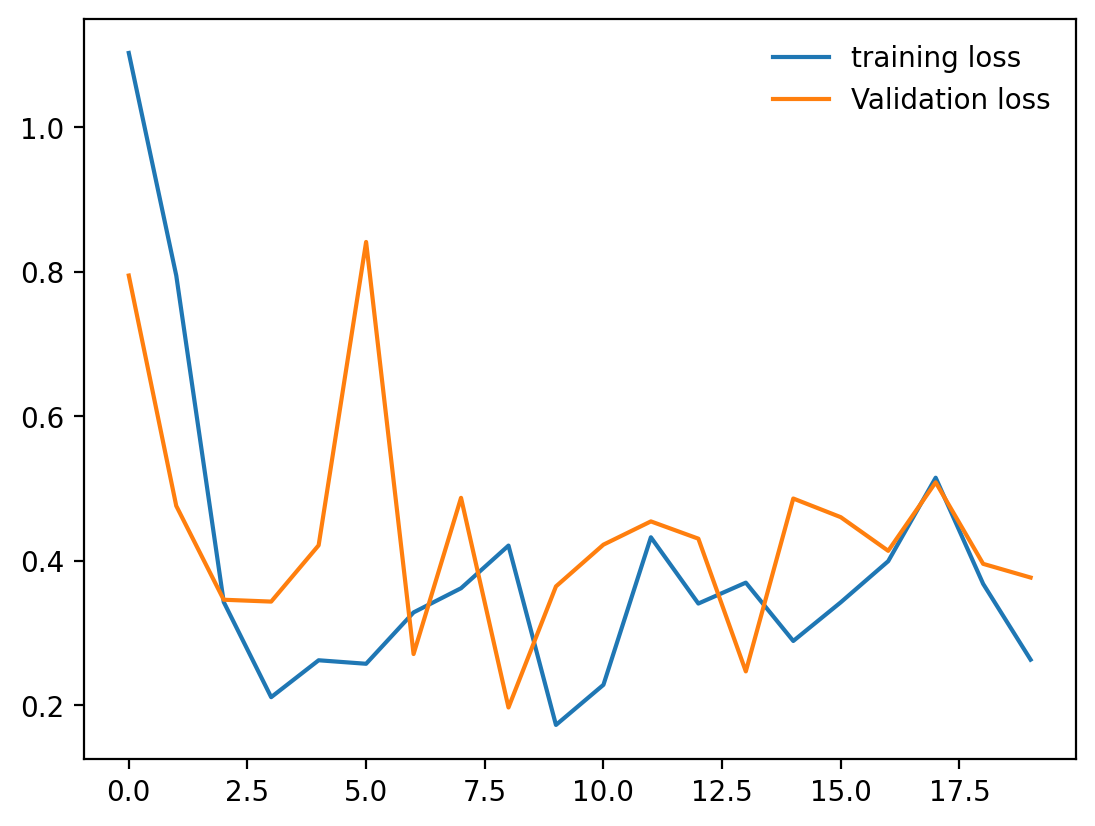

In [50]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

# in this graph, what is x-axis? y-axis?
# x-axis: epoch
# y-axis: loss

# ÌïôÏäµ/ÌÖåÏä§Ìä∏ ÏôÑÎ£åÎêú Î™®Îç∏ÏùÑ Ï†ÄÏû•ÌïúÎã§.

In [51]:
# Ï∂îÌõÑ Î°úÎìúÌïòÏó¨ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎèÑÎ°ù ÌïôÏäµ/ÌÖåÏä§Ìä∏ ÏôÑÎ£åÎêú Î™®Îç∏ÏùÑ Ï†ÄÏû•ÌïúÎã§.
torch.save(model, 'moonrockmodel.pth')

# ÏôÑÏÑ±Îêú Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏòàÏ∏°ÌïúÎã§.

## Ï†ÄÏû•Ìïú Î™®Îç∏ÏùÑ Î∂àÎü¨Ïò®Îã§.

In [52]:
# Ï†ÄÏû•Ìïú Î™®Îç∏ÏùÑ Î∂àÎü¨Ïò®Îã§.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = torch.load('moonrockmodel.pth')

/tmp/ipykernel_23401/2909459748.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('moonrockmodel.pth')


### (ÌôïÏù∏) Î∂àÎü¨Ïò® Î™®Îç∏ÏùÑ ÌôïÏù∏Ìï¥ Î≥∏Îã§.

In [53]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

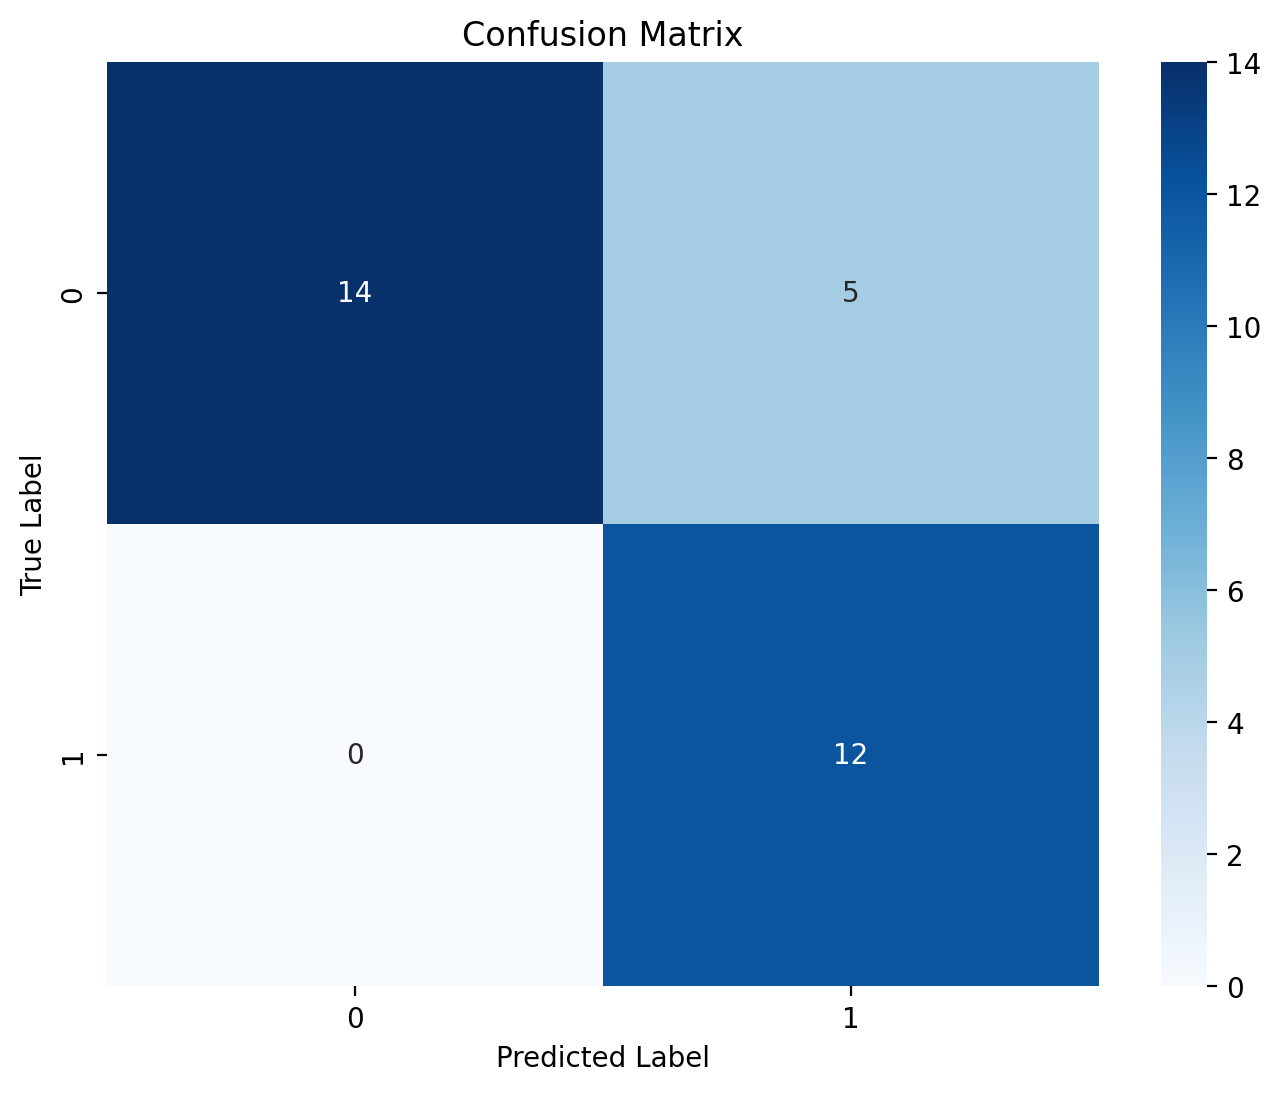


üìä Binary Classification Metrics
Accuracy : 0.8387
Precision: 0.7059
Recall   : 1.0000
F1 Score : 0.8276

üìä Per-Class Metrics
Class 0 - Precision: 1.0000, Recall: 0.7368, F1: 0.8485
Class 1 - Precision: 0.7059, Recall: 1.0000, F1: 0.8276

üßæ Classification Report
              precision    recall  f1-score   support

           0       1.00      0.74      0.85        19
           1       0.71      1.00      0.83        12

    accuracy                           0.84        31
   macro avg       0.85      0.87      0.84        31
weighted avg       0.89      0.84      0.84        31



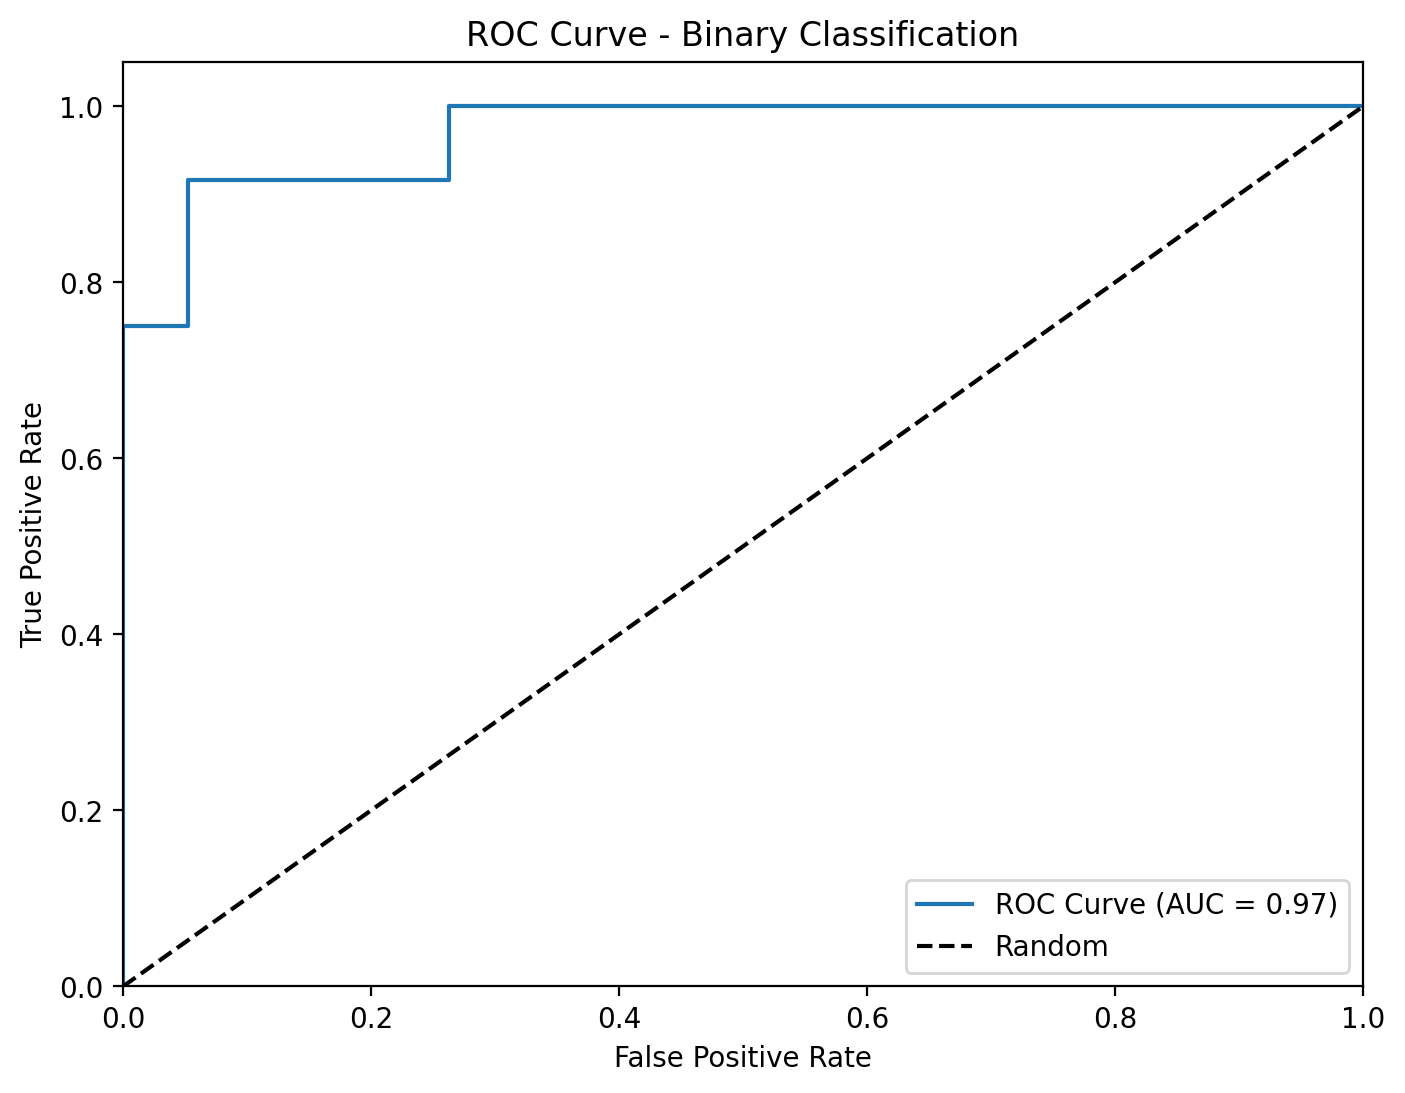


üßÆ AUC Score: 0.9693

üîç Confusion Matrix Analysis
True Negatives (TN) : 14
False Positives (FP): 5
False Negatives (FN): 0
True Positives (TP) : 12

‚úÖ Manual Calculation Verification
Manual Accuracy : 0.8387
Manual Precision: 0.7059
Manual Recall   : 1.0000
Manual F1 Score : 0.8276


In [54]:
# ÌïÑÏàò ÎùºÏù¥Î∏åÎü¨Î¶¨ import
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, auc,
    accuracy_score, precision_score, recall_score, f1_score
)
from sklearn.preprocessing import label_binarize
import torch.nn.functional as F

# Î™®Îç∏ÏùÑ ÌèâÍ∞Ä Î™®ÎìúÎ°ú Ï†ÑÌôò
model.eval()

# ÏòàÏ∏°Í∞í, Ïã§Ï†úÍ∞í, softmax ÌôïÎ•†Í∞í Ï†ÄÏû• Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî
all_preds = []
all_labels = []
all_probs = []

# ÌÖåÏä§Ìä∏ÏÖãÏúºÎ°ú ÏòàÏ∏°
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        logps = model(inputs)
        probs = F.softmax(logps, dim=1)  # ‚úÖ Ïò¨Î∞îÎ•∏ softmax Í≥ÑÏÇ∞
        preds = probs.argmax(dim=1)
        
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

# -----------------------------
# 1. Confusion Matrix
# -----------------------------
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# -----------------------------
# 2. Ïù¥ÏßÑÎ∂ÑÎ•òÏö© Î©îÌä∏Î¶≠ Í≥ÑÏÇ∞
# -----------------------------
acc = accuracy_score(all_labels, all_preds)

# Ïù¥ÏßÑÎ∂ÑÎ•òÏùò Í≤ΩÏö∞
if len(set(all_labels)) == 2:
    prec = precision_score(all_labels, all_preds, average='binary')
    rec = recall_score(all_labels, all_preds, average='binary')
    f1 = f1_score(all_labels, all_preds, average='binary')
    
    # Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ Î©îÌä∏Î¶≠ÎèÑ ÌôïÏù∏
    prec_per_class = precision_score(all_labels, all_preds, average=None)
    rec_per_class = recall_score(all_labels, all_preds, average=None)
    f1_per_class = f1_score(all_labels, all_preds, average=None)
    
    print(f"\nüìä Binary Classification Metrics")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")
    
    print(f"\nüìä Per-Class Metrics")
    for i in range(len(prec_per_class)):
        print(f"Class {i} - Precision: {prec_per_class[i]:.4f}, Recall: {rec_per_class[i]:.4f}, F1: {f1_per_class[i]:.4f}")
        
else:
    # Îã§Ï§ëÎ∂ÑÎ•òÏùò Í≤ΩÏö∞
    prec = precision_score(all_labels, all_preds, average='weighted')
    rec = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    
    print(f"\nüìä Multi-class Evaluation Metrics")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")

# -----------------------------
# 3. Classification Report
# -----------------------------
print("\nüßæ Classification Report")
print(classification_report(all_labels, all_preds))

# -----------------------------
# 4. ROC Curve & AUC
# -----------------------------
num_classes = len(set(all_labels))

if num_classes == 2:
    # Ïù¥ÏßÑÎ∂ÑÎ•òÏùò Í≤ΩÏö∞ - Îçî Í∞ÑÎã®Ìïú Î∞©Î≤ï
    y_score = np.array(all_probs)[:, 1]  # positive classÏùò ÌôïÎ•†Îßå ÏÇ¨Ïö©
    fpr, tpr, _ = roc_curve(all_labels, y_score)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Binary Classification')
    plt.legend(loc="lower right")
    plt.show()
    
    print(f"\nüßÆ AUC Score: {roc_auc:.4f}")
    
else:
    # Îã§Ï§ëÎ∂ÑÎ•òÏùò Í≤ΩÏö∞ - One-vs-Rest
    y_true_bin = label_binarize(all_labels, classes=list(range(num_classes)))
    y_score = np.array(all_probs)
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])  # ‚úÖ Ïò§ÌÉÄ ÏàòÏ†ï
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # ÌèâÍ∑† AUC
    all_auc = np.mean(list(roc_auc.values()))
    
    # ROC Curve plot
    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title("ROC Curve (One-vs-Rest)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()
    
    print(f"\nüßÆ Average AUC: {all_auc:.4f}")

# -----------------------------
# 5. Ï∂îÍ∞Ä Î∂ÑÏÑù - ÌòºÎèôÌñâÎ†¨ ÏÑ∏Î∂Ä Î∂ÑÏÑù
# -----------------------------
if len(set(all_labels)) == 2:
    tn, fp, fn, tp = cm.ravel()
    
    print(f"\nüîç Confusion Matrix Analysis")
    print(f"True Negatives (TN) : {tn}")
    print(f"False Positives (FP): {fp}")
    print(f"False Negatives (FN): {fn}")
    print(f"True Positives (TP) : {tp}")
    
    # ÏàòÎèô Í≥ÑÏÇ∞ÏúºÎ°ú Í≤ÄÏ¶ù
    manual_acc = (tp + tn) / (tp + tn + fp + fn)
    manual_prec = tp / (tp + fp) if (tp + fp) > 0 else 0
    manual_rec = tp / (tp + fn) if (tp + fn) > 0 else 0
    manual_f1 = 2 * (manual_prec * manual_rec) / (manual_prec + manual_rec) if (manual_prec + manual_rec) > 0 else 0
    
    print(f"\n‚úÖ Manual Calculation Verification")
    print(f"Manual Accuracy : {manual_acc:.4f}")
    print(f"Manual Precision: {manual_prec:.4f}")
    print(f"Manual Recall   : {manual_rec:.4f}")
    print(f"Manual F1 Score : {manual_f1:.4f}")

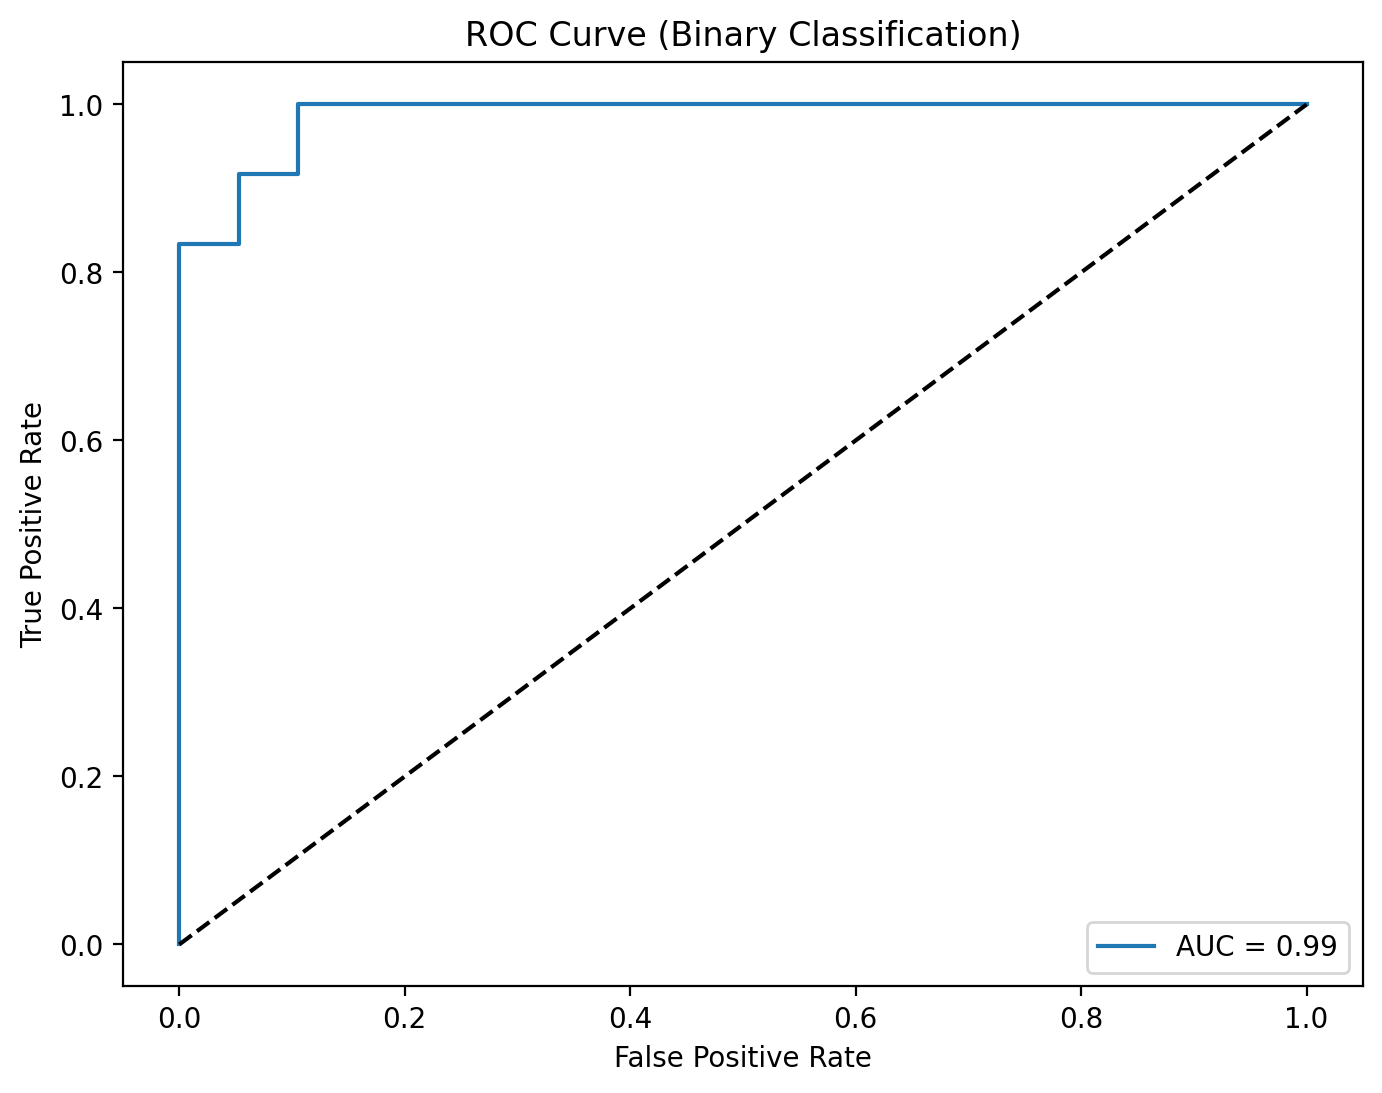


üßÆ AUC Score: 0.9868


In [46]:
from sklearn.metrics import roc_auc_score

# Ïù¥ÏßÑ Î∂ÑÎ•òÏù∏ÏßÄ ÌôïÏù∏
if num_classes == 2:
    # Ïù¥ÏßÑ Î∂ÑÎ•òÏùº Îïå
    y_true_bin = label_binarize(all_labels, classes=[0, 1])
    y_score_bin = np.array(all_probs)[:, 1]  # ÏñëÏÑ± ÌÅ¥ÎûòÏä§ ÌôïÎ•†Îßå Ï∂îÏ∂ú

    fpr, tpr, _ = roc_curve(y_true_bin, y_score_bin)
    roc_auc_val = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc_val:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title("ROC Curve (Binary Classification)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

    print(f"\nüßÆ AUC Score: {roc_auc_val:.4f}")

else:
    # Îã§Ï§ë ÌÅ¥ÎûòÏä§Ïùº Îïå
    y_true_bin = label_binarize(all_labels, classes=list(range(num_classes)))
    y_score = np.array(all_probs)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # ÌèâÍ∑† AUC
    all_auc = np.mean(list(roc_auc.values()))

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title("ROC Curve (Multiclass)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

    print(f"\nüßÆ Average AUC (macro): {all_auc:.4f}")


## Ïù¥ÎØ∏ÏßÄ ÏòàÏ∏°ÏùÑ ÏúÑÌï¥ predict_image() Ìï®ÏàòÎ•º ÎßåÎì†Îã§.

In [41]:
def predict_image(image):
    image_tensor = t_transforms(image).float()
    input = image_tensor.unsqueeze_(0)
    input = input.to(device)
    output = model(input)
    index = output.data.numpy().argmax()

    return index

## 5Í∞úÏùò Ïù¥ÎØ∏ÏßÄÎ•º ÏûÑÏùòÎ°ú Í∞ÄÏ†∏ÏôÄ ÏòàÏ∏°Ìï¥ Î≥∏Îã§.

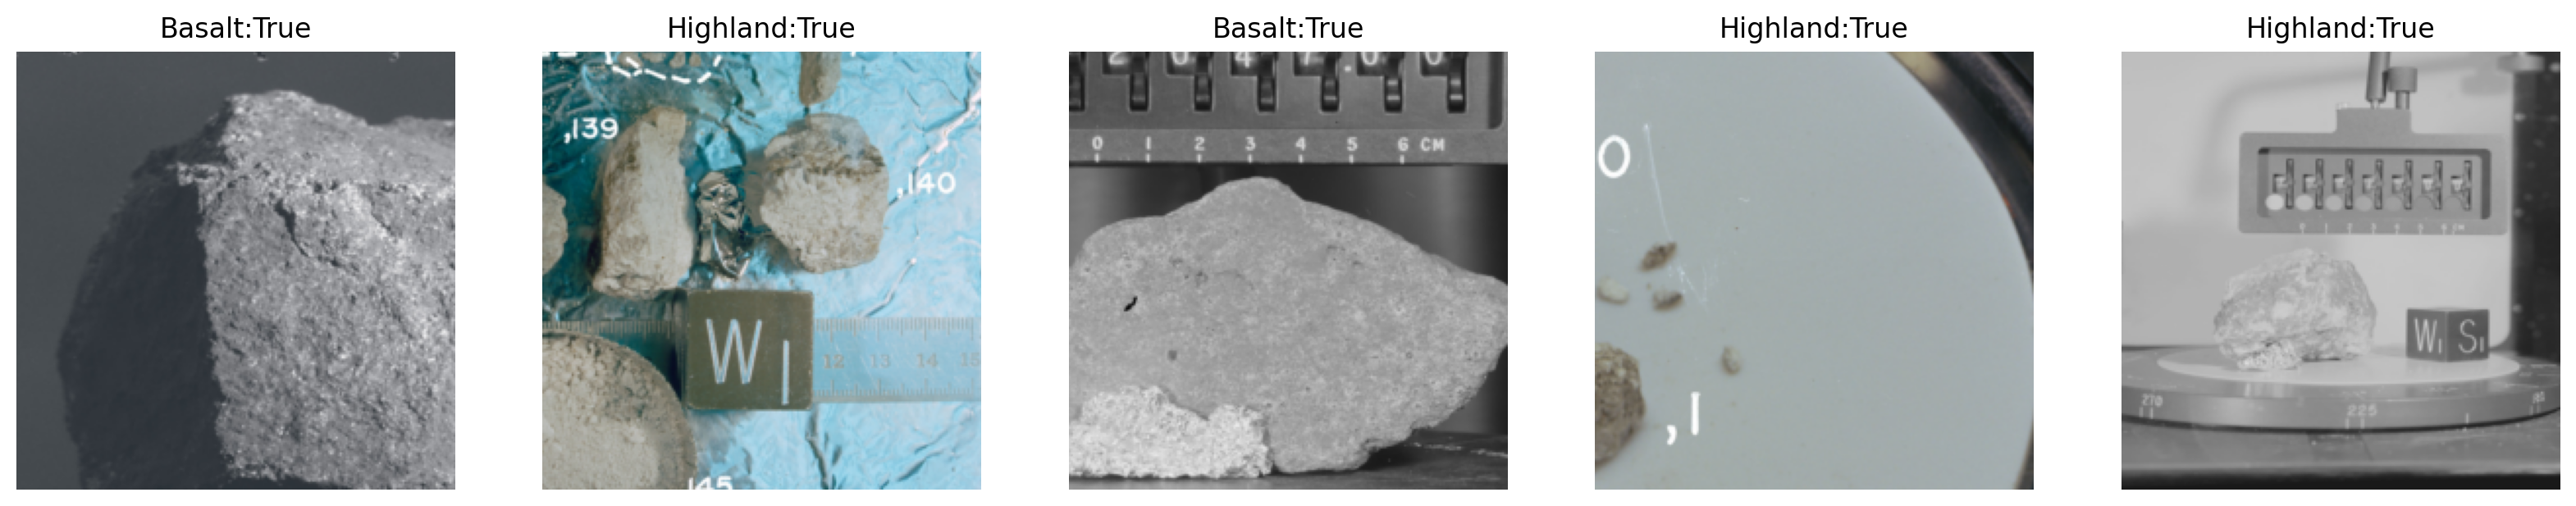

In [42]:
# Î™®Îç∏ ÌèâÍ∞Ä Î™®ÎìúÎ°ú Ï†ÑÌôòÌïúÎã§.
model.eval()
# 5Í∞úÏùò Ïù¥ÎØ∏ÏßÄÎ•º ÎûúÎç§ÌïòÍ≤å Í∞ÄÏ†∏Ïò® ÌõÑ PIL ÌòïÏãù Î≥ÄÌôò, ÌëúÏãúÌï† Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞Î•º ÏÑ§Ï†ïÌïúÎã§.
to_pil = transforms.ToPILImage()
images, labels = get_random_images(5)
fig = plt.figure(figsize=(20, 20))
# Îç∞Ïù¥ÌÑ∞Ïùò class Î™©Î°ùÏùÑ ÏñªÎäîÎã§.
classes = trainloader.dataset.classes

# 5Í∞úÏùò Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌï¥ loopÎ•º ÏàòÌñâÌïúÎã§.
for ii in range(len(images)):
    # Í∞Å Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌï¥ classÎ•º ÏòàÏ∏°ÌïúÎã§.
    image = to_pil(images[ii])
    index = predict_image(image)
    # Ïù¥ÎØ∏ÏßÄ ÏïÑÎûòÏóê classÎ•º ÌëúÏãúÌïòÎèÑÎ°ù ÏÑ§Ï†ïÌïúÎã§.
    sub = fig.add_subplot(1, len(images), ii+1)
    res = labels[ii].item() == index
    sub.set_title(classes[index] + ':' + str(res))
    plt.axis('off')
    plt.imshow(image)
# Î†àÏù¥Î∏îÏù¥ Ï∂îÍ∞ÄÎêú Ïù¥ÎØ∏ÏßÄÎ•º Î≥¥Ïó¨Ï§ÄÎã§.
plt.show()